In [17]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim


In [18]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1050 Ti'

In [19]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


In [20]:
x = torch.tensor([
    [1],
    [2],
    [3],
    [4],
    [5],
    [6]
],dtype=torch.float32) # input tensor
y = torch.tensor([
    [2],
    [4],
    [6],
    [8],
    [10],
    [12]
],dtype=torch.float32)  # expected output
w = torch.randn(1,1,dtype=torch.float32,requires_grad=True)
# b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)


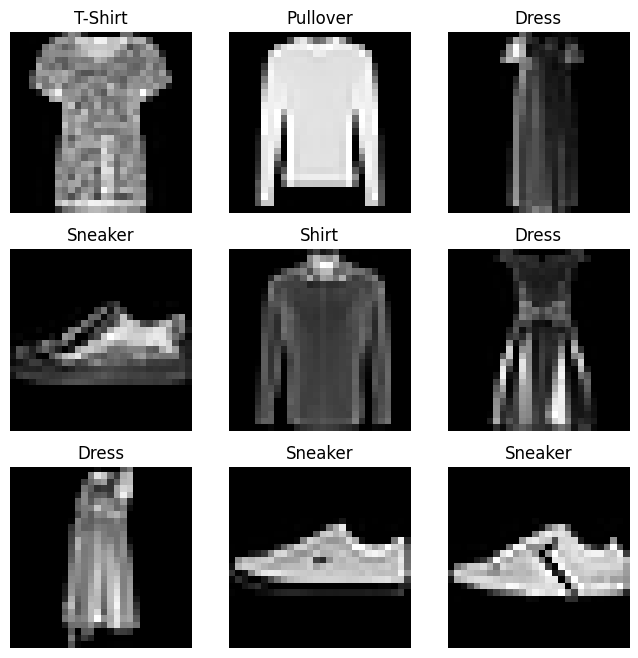

In [21]:
import matplotlib.pyplot as plt
labels_map = {     
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [22]:
train_dataloader =DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


In [ ]:
train_features,train_lables =next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")